In [65]:
%matplotlib inline
from spectral_cube import SpectralCube
import spectral_cube
import numpy as np
from astropy import units as u, visualization
from astropy.visualization import simple_norm
import pylab as pl

import warnings
import spectral_cube
warnings.simplefilter('ignore', spectral_cube.utils.BeamWarning)
warnings.simplefilter('ignore', spectral_cube.utils.StokesWarning)
warnings.simplefilter('ignore', spectral_cube.utils.PossiblySlowWarning)

visualization.quantity_support()


<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x7fc6b4019a50>

In [66]:
pl.rcParams['font.size'] = 14
pl.rcParams['image.origin'] = 'lower'
pl.rcParams['image.interpolation'] = 'none'
pl.rcParams['figure.facecolor'] = 'w'

From the casa docs:
"alpha = taylorcoeff_1 / taylorcoeff_0"

In [67]:
import os
try:
    os.chdir('/orange/adamginsburg/ALMA_IMF/2017.1.01355.L/RestructuredImagingResults')
except FileNotFoundError:
    os.chdir('/home/adam/Dropbox_UFL/ALMA-IMF/December2020Release/')

In [68]:
finaliter_prefix = finaliter_prefix_b3 = "G333.60/B3/cleanest/G333.60_B3_uid___A001_X1296_X1a3_continuum_merged_12M_robust0_selfcal5_finaliter"

/home/adam/repos/casa-formats-io/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/home/adam/repos/casa-formats-io/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/home/adam/repos/casa-formats-io/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/home/adam/repos/casa-formats-io/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/home/adam/repos/casa-formats-io/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/home/adam

Text(0.5, 1.0, 'model.tt1')

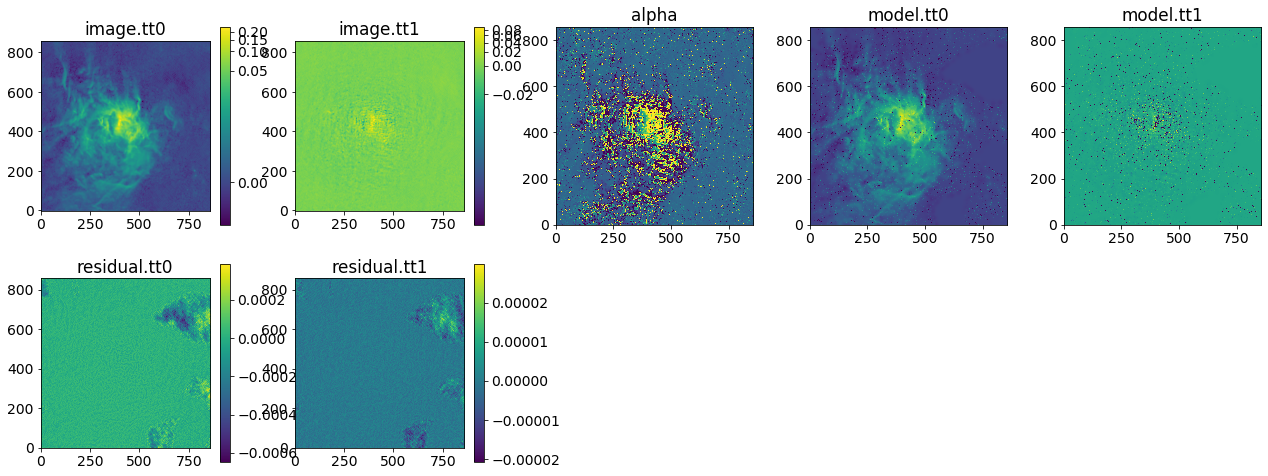

In [69]:
cutoutregion = 'fk5; box(245.539, -50.1002, 60",60")'
pl.figure(figsize=(22,8))
image = SpectralCube.read(f'{finaliter_prefix}.image.tt0', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,1).imshow(image[0].value, norm=simple_norm(image[0].value, stretch='log')); pl.colorbar(mappable=pl.gca().images[0])
pl.title("image.tt0")
imagett1 = SpectralCube.read(f'{finaliter_prefix}.image.tt1', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,2).imshow(imagett1[0].value, norm=simple_norm(imagett1[0].value, stretch='log')); pl.colorbar(mappable=pl.gca().images[0])
pl.title("image.tt1")
residual = SpectralCube.read(f'{finaliter_prefix}.residual.tt0', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,6).imshow(residual[0].value, norm=simple_norm(residual[0].value, stretch='linear')); pl.colorbar(mappable=pl.gca().images[0])
pl.title("residual.tt0")
residualtt1 = SpectralCube.read(f'{finaliter_prefix}.residual.tt1', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,7).imshow(residualtt1[0].value, norm=simple_norm(residualtt1[0].value, stretch='linear')); pl.colorbar(mappable=pl.gca().images[0])
pl.title("residual.tt1")
#alpha = SpectralCube.read(f'{finaliter_prefix}.alpha', format='casa_image').subcube_from_ds9region(cutoutregion)
alpha = image / imagett1
pl.subplot(2,5,3).imshow(alpha[0].value, norm=simple_norm(alpha[0].value, stretch='linear', min_cut=-2, max_cut=4));
pl.title("alpha")
model = SpectralCube.read(f'{finaliter_prefix}.model.tt0', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,4).imshow(model[0].value, norm=simple_norm(model[0].value, stretch='log', max_percent=99.995, min_percent=1));
pl.title("model.tt0")
modeltt1 = SpectralCube.read(f'{finaliter_prefix}.model.tt1', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,5).imshow(modeltt1[0].value, norm=simple_norm(modeltt1[0].value, stretch='log', max_percent=99.995, min_percent=1));
pl.title("model.tt1")

In [70]:
tt0_std = image.mad_std()
tt1_std = imagett1.mad_std()
mask = (image > 5*tt0_std)# & (imagett1 > tt1_std)
imagem = image.with_mask(mask)
imagett1m = imagett1.with_mask(mask)
alpha = imagett1m / imagem

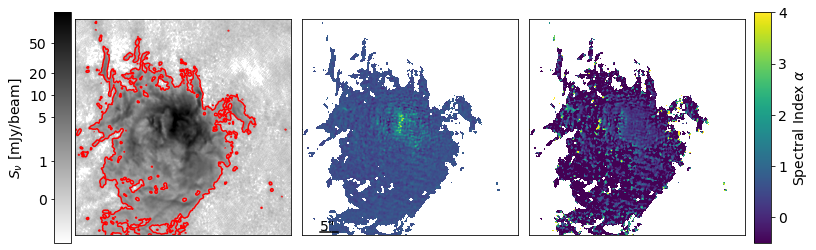

In [71]:
tt0_std = image.mad_std()
tt1_std = imagett1.mad_std()
mask = (image > 1.5*tt0_std) #& (imagett1 > tt1_std)
imagem = image.with_mask(mask)
imagett1m = imagett1.with_mask(mask)
alpha = alpha_b3 = imagett1m / imagem
fig = pl.figure(figsize=(12,4))
ax = pl.subplot(1,3,1); ax.imshow(image[0].value*1e3, cmap='gray_r', norm=simple_norm(image[0].value*1e3, stretch='log', min_percent=2, max_percent=99.9));
ax.contour(image[0].value, levels=[1.5*tt0_std.value], colors=['r']); ax.set_xticks([]); ax.set_yticks([]);
cb=pl.colorbar(mappable=pl.gca().images[0], cax=fig.add_axes([0.1,0.1,0.02,0.8]))
cb.ax.yaxis.set_ticks_position('left')
cb.set_ticks([0,1,5,10,20,50])
cb.set_label("$S_\\nu$ [mJy/beam]")
cb.ax.yaxis.set_label_position('left')
ax = pl.subplot(1,3,2); ax.imshow(imagett1m[0].value); ax.set_xticks([]); ax.set_yticks([]);
cd = (image.wcs.pixel_scale_matrix[1,1] * 3600)
ax.plot([70,70+5/cd], [10,10], color='k')
ax.annotate('5"', (70, 15),)
ax = pl.subplot(1,3,3); ax.imshow(alpha[0].value, vmax=4, vmin=-0.5); ax.set_xticks([]); ax.set_yticks([]);
cb=pl.colorbar(mappable=pl.gca().images[0], cax=fig.add_axes([0.91,0.1,0.02,0.8]))
cb.set_label(r"Spectral Index $\alpha$")
pl.subplots_adjust(wspace=0.05)
pl.savefig("../paper_figures/G333_B3_spectral_index.pdf", bbox_inches='tight')

In [72]:
finaliter_prefix = finaliter_prefix_b6 = "G333.60/B6/cleanest/G333.60_B6_uid___A001_X1296_X19b_continuum_merged_12M_robust0_selfcal5_finaliter"

/home/adam/repos/casa-formats-io/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/home/adam/repos/casa-formats-io/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/home/adam/repos/casa-formats-io/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/home/adam/repos/casa-formats-io/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/home/adam/repos/casa-formats-io/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/home/adam

Text(0.5, 1.0, 'model.tt1')

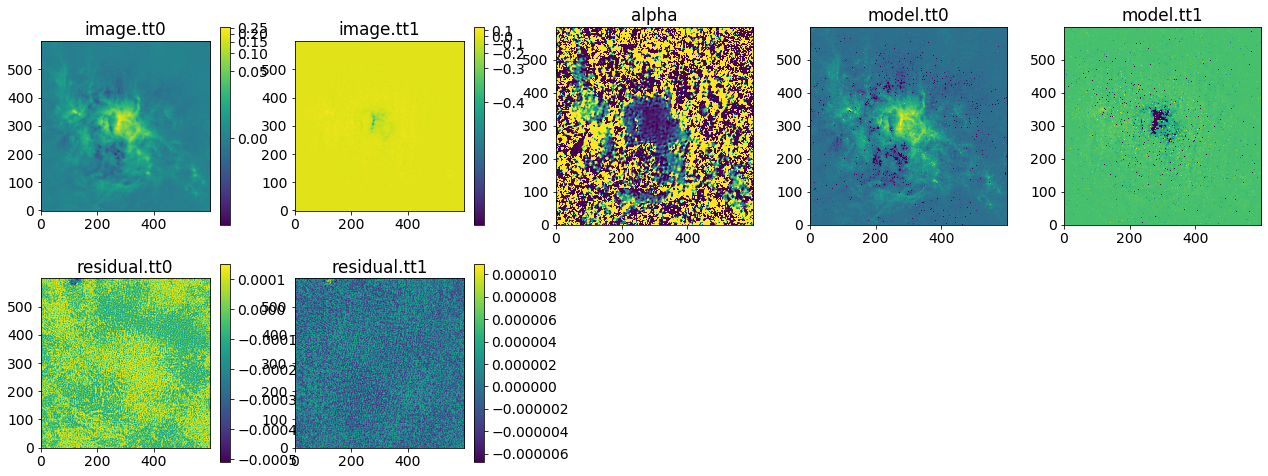

In [73]:
pl.figure(figsize=(22,8))
image = SpectralCube.read(f'{finaliter_prefix}.image.tt0', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,1).imshow(image[0].value, norm=simple_norm(image[0].value, stretch='log')); pl.colorbar(mappable=pl.gca().images[0])
pl.title("image.tt0")
imagett1 = SpectralCube.read(f'{finaliter_prefix}.image.tt1', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,2).imshow(imagett1[0].value, norm=simple_norm(imagett1[0].value, stretch='log')); pl.colorbar(mappable=pl.gca().images[0])
pl.title("image.tt1")
residual = SpectralCube.read(f'{finaliter_prefix}.residual.tt0', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,6).imshow(residual[0].value, norm=simple_norm(residual[0].value, stretch='linear')); pl.colorbar(mappable=pl.gca().images[0])
pl.title("residual.tt0")
residualtt1 = SpectralCube.read(f'{finaliter_prefix}.residual.tt1', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,7).imshow(residualtt1[0].value, norm=simple_norm(residualtt1[0].value, stretch='linear')); pl.colorbar(mappable=pl.gca().images[0])
pl.title("residual.tt1")
#alpha = SpectralCube.read(f'{finaliter_prefix}.alpha', format='casa_image').subcube_from_ds9region(cutoutregion)
alpha = imagett1 / image
pl.subplot(2,5,3).imshow(alpha[0].value, norm=simple_norm(alpha[0].value, stretch='linear', min_cut=-2, max_cut=4));
pl.title("alpha")
model = SpectralCube.read(f'{finaliter_prefix}.model.tt0', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,4).imshow(model[0].value, norm=simple_norm(model[0].value, stretch='log', max_percent=99.995, min_percent=1));
pl.title("model.tt0")
modeltt1 = SpectralCube.read(f'{finaliter_prefix}.model.tt1', format='casa_image').subcube_from_ds9region(cutoutregion)
pl.subplot(2,5,5).imshow(modeltt1[0].value, norm=simple_norm(modeltt1[0].value, stretch='log', max_percent=99.995, min_percent=1));
pl.title("model.tt1")

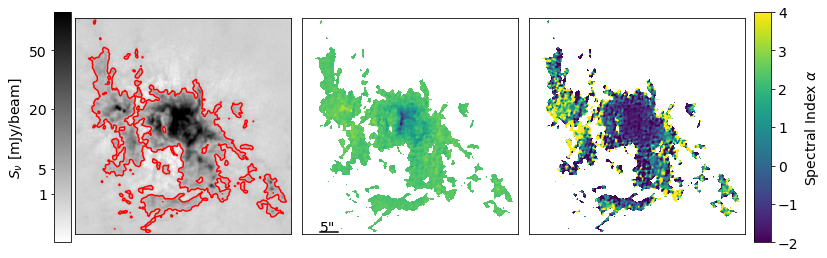

In [74]:
tt0_std = image.mad_std()
tt1_std = imagett1.mad_std()
mask = (image > 2*tt0_std) #& (imagett1 > tt1_std)
imagem = image.with_mask(mask)
imagett1m = imagett1.with_mask(mask)
alpha = alpha_b6 = imagett1m / imagem
fig = pl.figure(figsize=(12,4))
ax = pl.subplot(1,3,1); ax.imshow(image[0].value*1e3, cmap='gray_r', norm=simple_norm(image[0].value*1e3, stretch='asinh', min_percent=0, max_percent=99.5));
ax.contour(image[0].value, levels=[2*tt0_std.value], colors=['r']); ax.set_xticks([]); ax.set_yticks([]);
cb=pl.colorbar(mappable=pl.gca().images[0], cax=fig.add_axes([0.1,0.1,0.02,0.8]))
cb.ax.yaxis.set_ticks_position('left')
cb.set_ticks([1,5,20,50,100, 200, 500,])
cb.set_label("$S_\\nu$ [mJy/beam]")
cb.ax.yaxis.set_label_position('left')
ax = pl.subplot(1,3,2); ax.imshow(imagett1m[0].value); ax.set_xticks([]); ax.set_yticks([]);
cd = (image.wcs.pixel_scale_matrix[1,1] * 3600)
ax.plot([50,50+5/cd], [5,5], color='k')
ax.annotate('5"', (50, 7),)
ax = pl.subplot(1,3,3); ax.imshow(alpha[0].value, vmax=4, vmin=-2); ax.set_xticks([]); ax.set_yticks([]);
cb=pl.colorbar(mappable=pl.gca().images[0], cax=fig.add_axes([0.91,0.1,0.02,0.8]))
cb.set_label(r"Spectral Index $\alpha$")
pl.subplots_adjust(wspace=0.05)
pl.savefig("../paper_figures/G333_B6_spectral_index.pdf", bbox_inches='tight')

$$ I = \nu^\alpha $$
$$ I_3 / I_6 = (\nu_3 / \nu_6)^\alpha $$
$$ \log(I_3 / I_6) = \alpha \log(\nu_3 / \nu_6)

In [75]:
image_b3 = SpectralCube.read(f'{finaliter_prefix_b3}.image.tt0', format='casa_image').subcube_from_ds9region(cutoutregion)
image_b6 = SpectralCube.read(f'{finaliter_prefix_b6}.image.tt0', format='casa_image').subcube_from_ds9region(cutoutregion)

/home/adam/repos/casa-formats-io/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]
/home/adam/repos/casa-formats-io/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]


In [76]:
image_b3_convb6 = image_b3.convolve_to(image_b6.beam)    

In [95]:
image_b3_repr = image_b3_convb6[0].reproject(image_b6[0].header)
image_tt1_b3 = SpectralCube.read(f'{finaliter_prefix_b3}.image.tt1', format='casa_image').subcube_from_ds9region(cutoutregion)
image_tt1_b3_repr = image_tt1_b3.convolve_to(image_b6.beam)[0].reproject(image_b6[0].header)
alpha_b3 = image_tt1_b3_repr / image_b3_repr

/home/adam/repos/casa-formats-io/casa_formats_io/casa_dask.py:232: RuntimeWarning: divide by zero encountered in long_scalars
  factors = [f for f in range(stacks[dim] + 1) if stacks[dim] % f == 0]


In [96]:
alpha_b3_b6 = (np.log(image_b3_repr / image_b6[0]) / np.log(image_b3.wcs.wcs.crval[2] / image_b6.wcs.wcs.crval[2])).value

/home/adam/repos/astropy/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in log
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


In [97]:
from astropy import stats

/home/adam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.
/home/adam/repos/astropy/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in log
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


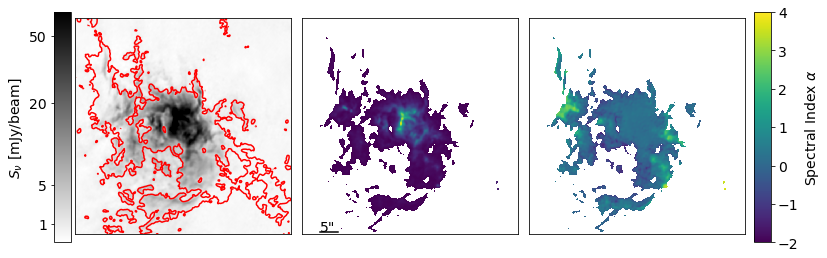

In [98]:
b3_std = stats.mad_std(image_b3_repr.value, ignore_nan=True)
b6_std = stats.mad_std(image_b6[0].value, ignore_nan=True)

mask = (image_b3_repr.value > 2*b3_std) & (image_b6[0].value > 2*b6_std)
alpha_b3_b6 = (np.log(image_b3_repr / image_b6[0]) / np.log(image_b3.wcs.wcs.crval[2] / image_b6.wcs.wcs.crval[2])).value
alpha_b3_b6[~mask] = np.nan
alpha_b3[~mask] = np.nan


fig = pl.figure(figsize=(12,4))
ax = pl.subplot(1,3,1); ax.imshow(image_b3_repr.value*1e3, cmap='gray_r', norm=simple_norm(image_b3_repr.value*1e3, stretch='asinh', min_percent=0, max_percent=99.5));
ax.contour(image[0].value, levels=[2*b3_std], colors=['r']); ax.set_xticks([]); ax.set_yticks([]);
cb=pl.colorbar(mappable=pl.gca().images[0], cax=fig.add_axes([0.1,0.1,0.02,0.8]))
cb.ax.yaxis.set_ticks_position('left')
cb.set_ticks([1,5,20,50,100, 200, 500,])
cb.set_label("$S_\\nu$ [mJy/beam]")
cb.ax.yaxis.set_label_position('left')
ax = pl.subplot(1,3,2); ax.imshow(image_b6.with_mask(mask)[0].value); ax.set_xticks([]); ax.set_yticks([]);
cd = (image.wcs.pixel_scale_matrix[1,1] * 3600)
ax.plot([50,50+5/cd], [5,5], color='k')
ax.annotate('5"', (50, 7),)
ax = pl.subplot(1,3,3); ax.imshow(alpha_b3_b6, vmax=4, vmin=-2); ax.set_xticks([]); ax.set_yticks([]);
cb=pl.colorbar(mappable=pl.gca().images[0], cax=fig.add_axes([0.91,0.1,0.02,0.8]))
cb.set_label(r"Spectral Index $\alpha$")
pl.subplots_adjust(wspace=0.05)
#pl.savefig("../paper_figures/G333_B6_spectral_index.pdf", bbox_inches='tight')

/home/adam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':
/home/adam/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


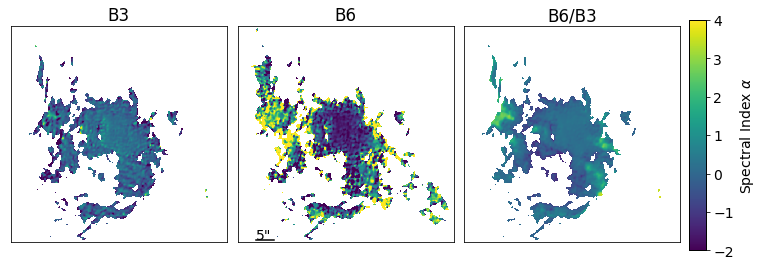

In [99]:
fig = pl.figure(figsize=(12,4))
ax = pl.subplot(1,3,1); ax.imshow(alpha_b3.value, vmax=4, vmin=-2); ax.set_xticks([]); ax.set_yticks([]);
ax.set_title("B3")
cb=pl.colorbar(mappable=pl.gca().images[0], cax=fig.add_axes([0.91,0.1,0.02,0.8]))
cb.set_label(r"Spectral Index $\alpha$")

ax = pl.subplot(1,3,2); ax.imshow(alpha_b6[0].value, vmax=4, vmin=-2); ax.set_xticks([]); ax.set_yticks([]);
ax.set_title("B6")
cb=pl.colorbar(mappable=pl.gca().images[0], cax=fig.add_axes([0.91,0.1,0.02,0.8]))
cb.set_label(r"Spectral Index $\alpha$")
cd = (image.wcs.pixel_scale_matrix[1,1] * 3600)
ax.plot([50,50+5/cd], [5,5], color='k')
ax.annotate('5"', (50, 7),)
ax = pl.subplot(1,3,3); ax.imshow(alpha_b3_b6, vmax=4, vmin=-2); ax.set_xticks([]); ax.set_yticks([]);
cb=pl.colorbar(mappable=pl.gca().images[0], cax=fig.add_axes([0.91,0.1,0.02,0.8]))
cb.set_label(r"Spectral Index $\alpha$")
ax.set_title("B6/B3")
pl.subplots_adjust(wspace=0.05)
pl.savefig("../paper_figures/G333_B3B6_spectral_index.pdf", bbox_inches='tight')

In [ ]:
noise_region_b3 = "/home/adam/work/alma-imf/reduction/reduction/noise_estimation_regions/G333.60_B3_noise_sampling.reg"
noise_region_b6 = "/home/adam/work/alma-imf/reduction/reduction/noise_estimation_regions/G333.60_B6_noise_sampling.reg"